<a href="https://colab.research.google.com/github/Beneroms/Predictive-Modeling-of-Oil-Production-Using-Reservoir-Production-Data_IFP-FINAL-REPORT/blob/main/Predictive_Modeling_of_Oil_Production_Using_Reservoir_Pressure_Data_A_Machine_Learning_Approach_IFP_FINAL_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving production and pressure data_updated.csv to production and pressure data_updated (1).csv


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('production and pressure data_updated.csv')

In [ ]:
df

,Unnamed: 0,Oil Production,Date,Pressure
0,0,8045.2,01/01/2019,353.5
1,1,9243.7,02/01/2019,426.8
2,2,7498.1,03/01/2019,313.4
3,3,6840.4,04/01/2019,362.5
4,4,6470.0,05/01/2019,456.1
...,...,...,...,...
56,56,727.9,09/01/2023,105.1
57,57,797.7,10/01/2023,119.9
58,58,685.8,11/01/2023,103.0
59,59,675.3,12/01/2023,105.2


In [ ]:
df.index = pd.to_datetime(df["Date"])
df= df.drop("Unnamed: 0",axis=1)

In [ ]:
df

,Oil Production,Date,Pressure
Date,,,
2019-01-01,8045.2,01/01/2019,353.5
2019-02-01,9243.7,02/01/2019,426.8
2019-03-01,7498.1,03/01/2019,313.4
2019-04-01,6840.4,04/01/2019,362.5
2019-05-01,6470.0,05/01/2019,456.1
...,...,...,...
2023-09-01,727.9,09/01/2023,105.1
2023-10-01,797.7,10/01/2023,119.9
2023-11-01,685.8,11/01/2023,103.0


In [ ]:
df = df[["Oil Production","Pressure"]]

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

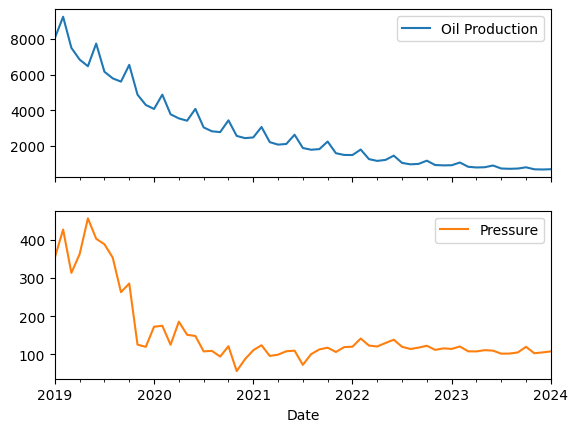

In [ ]:
df.plot(subplots=True)

<Axes: xlabel='Date'>

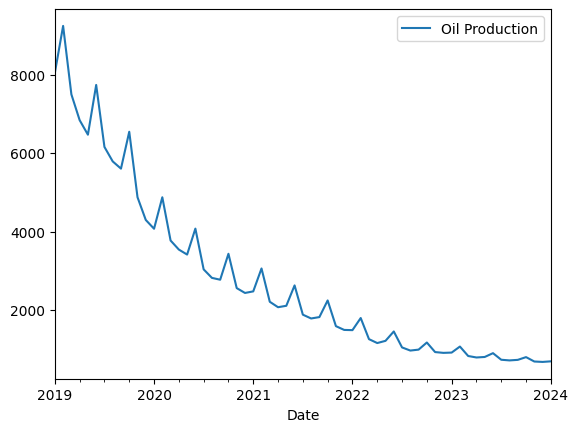

In [ ]:
data = df[["Oil Production"]]
data.plot()

In [ ]:
data

,Oil Production
Date,
2019-01-01,8045.2
2019-02-01,9243.7
2019-03-01,7498.1
2019-04-01,6840.4
2019-05-01,6470.0
...,...
2023-09-01,727.9
2023-10-01,797.7
2023-11-01,685.8


In [ ]:
data["yt-1"] = data.shift()["Oil Production"]

In [ ]:
data["Oil Production"].shift(2)

,Oil Production
Date,
2019-01-01,NaN
2019-02-01,NaN
2019-03-01,8045.2
2019-04-01,9243.7
2019-05-01,7498.1
...,...
2023-09-01,730.7
2023-10-01,713.9
2023-11-01,727.9


In [ ]:
data["yt-2"] = data["Oil Production"].shift(2)

In [ ]:
data

,Oil Production,yt-1,yt-2
Date,,,
2019-01-01,8045.2,NaN,NaN
2019-02-01,9243.7,8045.2,NaN
2019-03-01,7498.1,9243.7,8045.2
2019-04-01,6840.4,7498.1,9243.7
2019-05-01,6470.0,6840.4,7498.1
...,...,...,...
2023-09-01,727.9,713.9,730.7
2023-10-01,797.7,727.9,713.9
2023-11-01,685.8,797.7,727.9


In [ ]:
data["yt-3"] = data["Oil Production"].shift(3)

In [ ]:
data

,Oil Production,yt-1,yt-2,yt-3
Date,,,,
2019-01-01,8045.2,NaN,NaN,NaN
2019-02-01,9243.7,8045.2,NaN,NaN
2019-03-01,7498.1,9243.7,8045.2,NaN
2019-04-01,6840.4,7498.1,9243.7,8045.2
2019-05-01,6470.0,6840.4,7498.1,9243.7
...,...,...,...,...
2023-09-01,727.9,713.9,730.7,898.6
2023-10-01,797.7,727.9,713.9,730.7
2023-11-01,685.8,797.7,727.9,713.9


In [ ]:
# Sample input data
X = data[["yt-1","yt-2","yt-3"]][3:]
y = data[['Oil Production']][3:]

### **Linear Regression Model**

In [ ]:
model = LinearRegression()

In [ ]:
#train the model

model.fit(X,y)

LinearRegression()

In [ ]:
y_pred = model.predict(X)

In [ ]:
y_pred

array([[7078.57905622],
       [7032.81801327],
       [6188.18970874],
       [6442.51527481],
       [5795.3131817 ],
       [5912.89277273],
       [5236.29337824],
       [5477.18381245],
       [4821.52383407],
       [4725.98895055],
       [3977.49725785],
       [4082.14564327],
       [3633.58843164],
       [3697.61464221],
       [3229.00556399],
       [3408.70231153],
       [3005.08443247],
       [3032.18179204],
       [2621.33177947],
       [2814.61972082],
       [2507.72649623],
       [2591.81290219],
       [2285.51455618],
       [2489.62970235],
       [2215.48829117],
       [2269.15802555],
       [1968.74478269],
       [2140.26027892],
       [1900.6178856 ],
       [1960.29927152],
       [1700.38077422],
       [1846.78257608],
       [1633.72730298],
       [1670.29594229],
       [1425.57670763],
       [1519.60212818],
       [1327.86931913],
       [1335.37220564],
       [1157.43607724],
       [1228.12349178],
       [1105.29087121],
       [1110.913

In [ ]:
y

,Oil Production
Date,
2019-04-01,6840.4
2019-05-01,6470.0
2019-06-01,7738.3
2019-07-01,6157.6
2019-08-01,5788.6
2019-09-01,5604.2
2019-10-01,6545.3
2019-11-01,4874.4
2019-12-01,4295.5


''

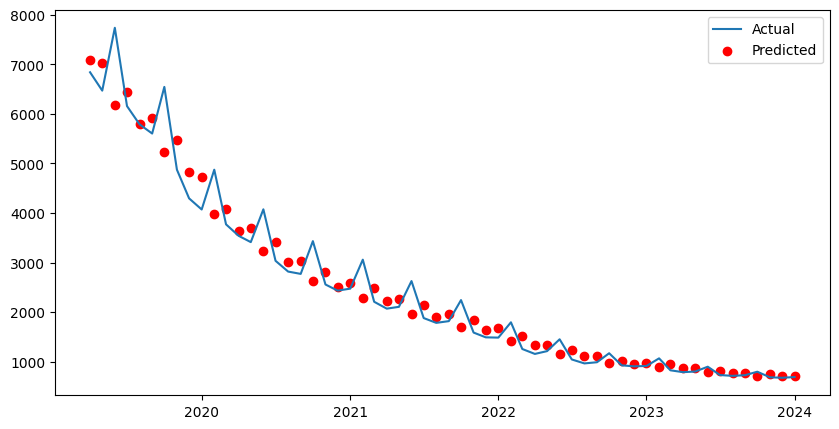

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y.index,y,label="Actual")
plt.scatter(y.index,y_pred,label="Predicted",c="red")
plt.legend()
;

In [ ]:
# Method 1: Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

### **Forecasting in future**

In [ ]:
data

,Oil Production,yt-1,yt-2,yt-3
Date,,,,
2019-01-01,8045.2,NaN,NaN,NaN
2019-02-01,9243.7,8045.2,NaN,NaN
2019-03-01,7498.1,9243.7,8045.2,NaN
2019-04-01,6840.4,7498.1,9243.7,8045.2
2019-05-01,6470.0,6840.4,7498.1,9243.7
...,...,...,...,...
2023-09-01,727.9,713.9,730.7,898.6
2023-10-01,797.7,727.9,713.9,730.7
2023-11-01,685.8,797.7,727.9,713.9


In [ ]:
y

,Oil Production
Date,
2019-04-01,6840.4
2019-05-01,6470.0
2019-06-01,7738.3
2019-07-01,6157.6
2019-08-01,5788.6
2019-09-01,5604.2
2019-10-01,6545.3
2019-11-01,4874.4
2019-12-01,4295.5


In [ ]:
#1st time in future , yt is unknown

yt,yt1,yt2,_ =  data.iloc[-1]

In [ ]:
yt

690.2

In [ ]:
yt2

685.8

In [ ]:
yt1

675.3

In [ ]:
yf = model.predict([[yt,yt1,yt2]])

In [ ]:
forecast = []
forecast.append(yf[0][0])

In [ ]:
n = 1

while n < 10:
    yt,yt1,yt2,_ =  yf[0][0],yt,yt1,yt2
    yf = model.predict([[yt,yt1,yt2]])
    forecast.append(yf[0][0])
    print(yf[0])
    n += 1

[679.87258278]
[682.61777667]
[681.19314019]
[679.32471953]
[679.35719073]
[678.65825212]
[677.71064673]
[677.24928903]
[676.704162]


In [ ]:
forecast

[684.3509401834795,
 679.8725827839481,
 682.617776672317,
 681.1931401914094,
 679.3247195313068,
 679.3571907270205,
 678.6582521169557,
 677.7106467321553,
 677.2492890280244,
 676.7041619988893]

In [ ]:
y.index[-1]+pd.DateOffset(days=-1)


Timestamp('2023-12-31 00:00:00')

In [ ]:
date_forec = pd.date_range(start=y.index[-1],periods=10,freq="M").shift(1,freq="D")

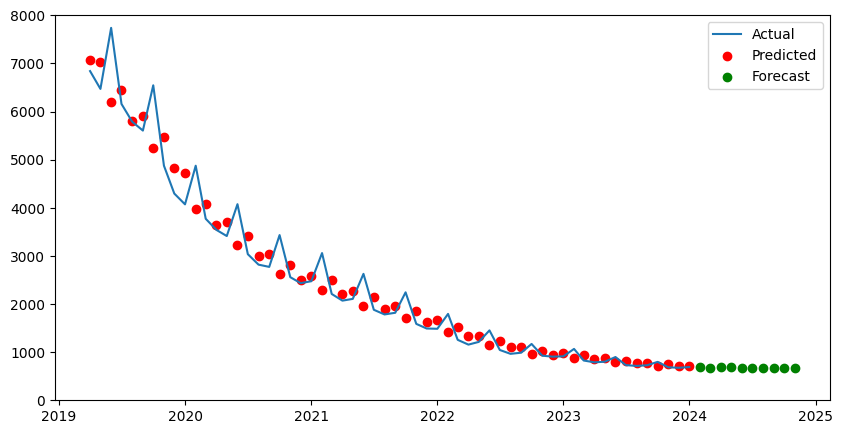

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y.index,y,label="Actual")
plt.scatter(y.index,y_pred,label="Predicted",c="red")
plt.scatter(date_forec,forecast,label="Forecast",c="green")
plt.ylim(0,8000)
plt.legend()

In [ ]:
!pip install pycaret

In [ ]:
import pycaret

In [ ]:
import joblib

In [ ]:
from pycaret.regression import *
s = setup(data, target = 'Oil Production',session_id=123)

,Description,Value
0,Session id,123
1,Target,Oil Production
2,Target type,Regression
3,Original data shape,"(61, 4)"
4,Transformed data shape,"(61, 4)"
5,Transformed train set shape,"(42, 4)"
6,Transformed test set shape,"(19, 4)"
7,Numeric features,3
8,Rows with missing values,4.9%
9,Preprocess,True


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,389.2192,462635.7158,536.0308,0.8572,0.1646,0.1357,0.0410
lr,Linear Regression,410.8981,443868.4717,538.1188,0.8340,0.1731,0.1581,1.0330
lasso,Lasso Regression,410.8972,443865.4217,538.1172,0.8340,0.1731,0.1581,0.0260
ridge,Ridge Regression,410.8985,443869.6475,538.1196,0.8340,0.1731,0.1581,0.0290
en,Elastic Net,410.8974,443866.6842,538.1176,0.8340,0.1731,0.1581,0.0290
lar,Least Angle Regression,410.8984,443869.3061,538.1194,0.8340,0.1731,0.1581,0.0260
llar,Lasso Least Angle Regression,410.8984,443870.9184,538.1196,0.8340,0.1731,0.1581,0.0260
br,Bayesian Ridge,409.5668,476248.0453,541.9307,0.8335,0.1742,0.1582,0.0250
omp,Orthogonal Matching Pursuit,454.0556,1135530.2715,655.9088,0.7715,0.2083,0.1688,0.0260
knn,K Neighbors Regressor,487.3398,791229.8195,682.8507,0.7708,0.2008,0.1724,0.0290


Processing:   0%|          | 0/81 [00:00<?, ?it/s]